In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
dataset = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

<h1>Exploratory Data Analysis</h1>

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
print(dataset[dataset.duplicated()].shape)

(0, 5)


In [7]:
for column in dataset.columns:
    print("{:20} {} unique values".format(column, len(dataset[column].unique())))

CustomerID           200 unique values
Gender               2 unique values
Age                  51 unique values
Annual Income (k$)   64 unique values
Spending Score (1-100) 84 unique values


In [8]:
dataset.rename(columns={'Genre':'Gender'}, inplace=True)

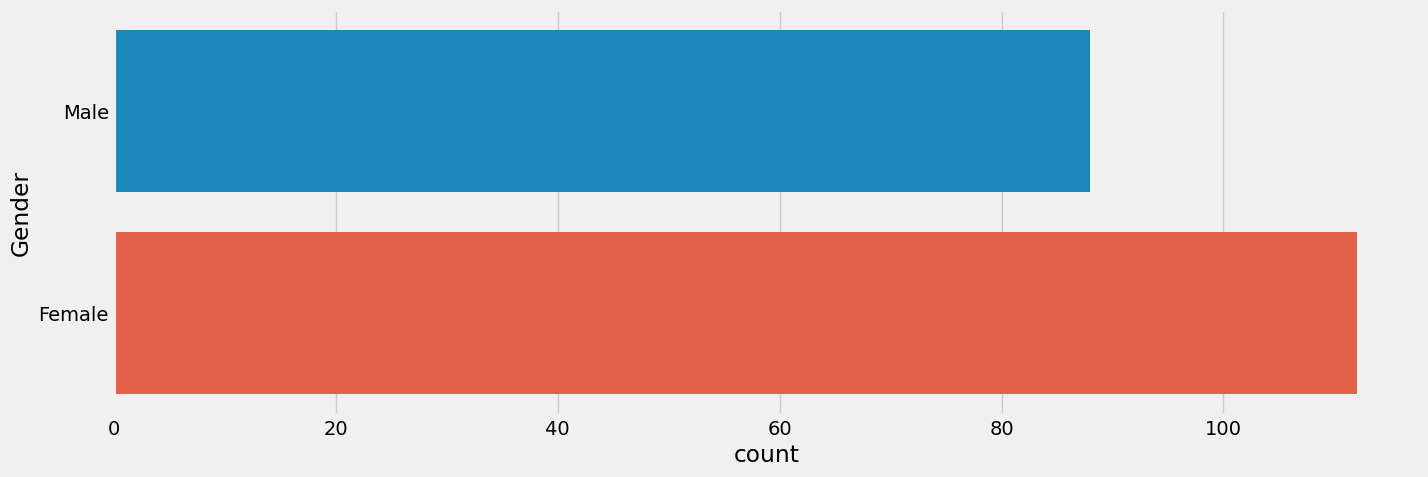

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 5))
ax = sns.countplot(y = 'Gender' , data = dataset)
plt.show()


A pair plot on gender shows that there are no distinct clusters between female and male mallgoers, but it should be noted that the scatter plots on the intersection between annual income and spending score shows hints of clusters, while age-related scatter plots show are generally interspersed with no meaningful clusters detected upon visual inspection. 

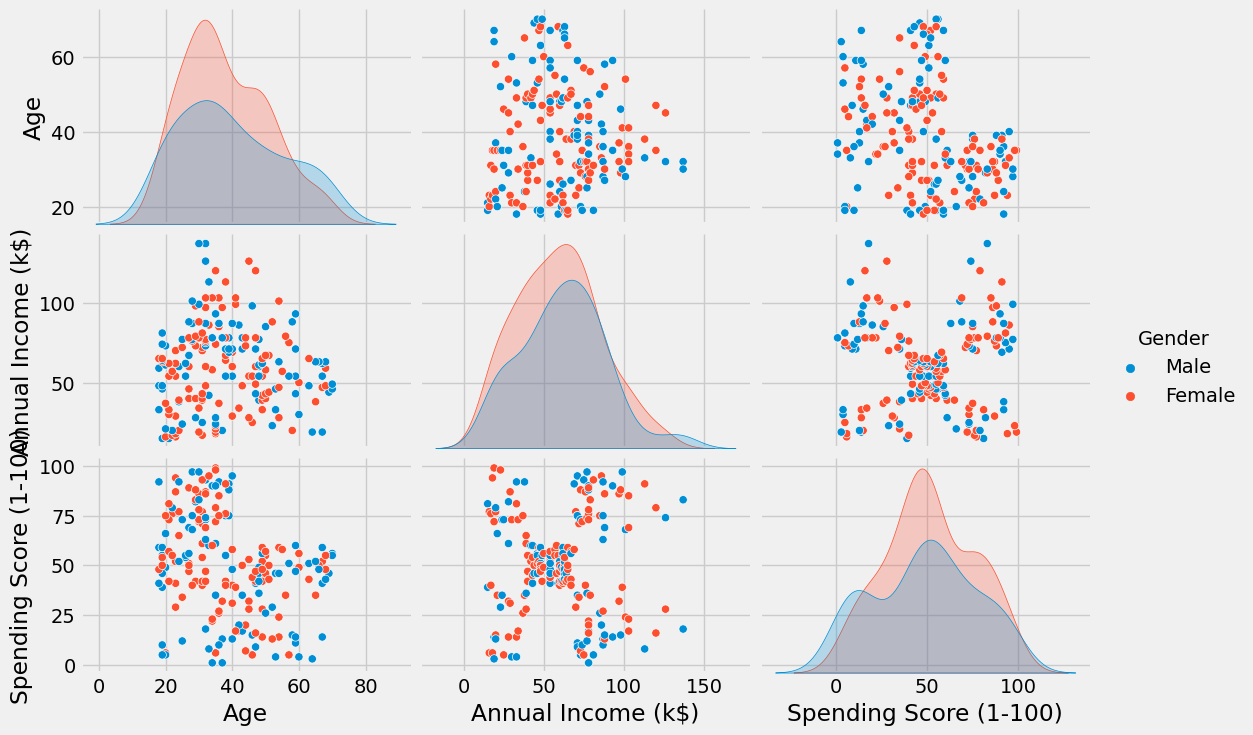

In [10]:
plt.style.use('fivethirtyeight')
sns.pairplot(dataset.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

As observed in the pair plot, a box plot on gender showed no significant differences in spending score annual income, thus eliminating Gender from the features to be considered. It is observed that an outlier was detected in the Max area of the Male Boxplot for Annual Income, which can also be seen in the box plot of annual income. 

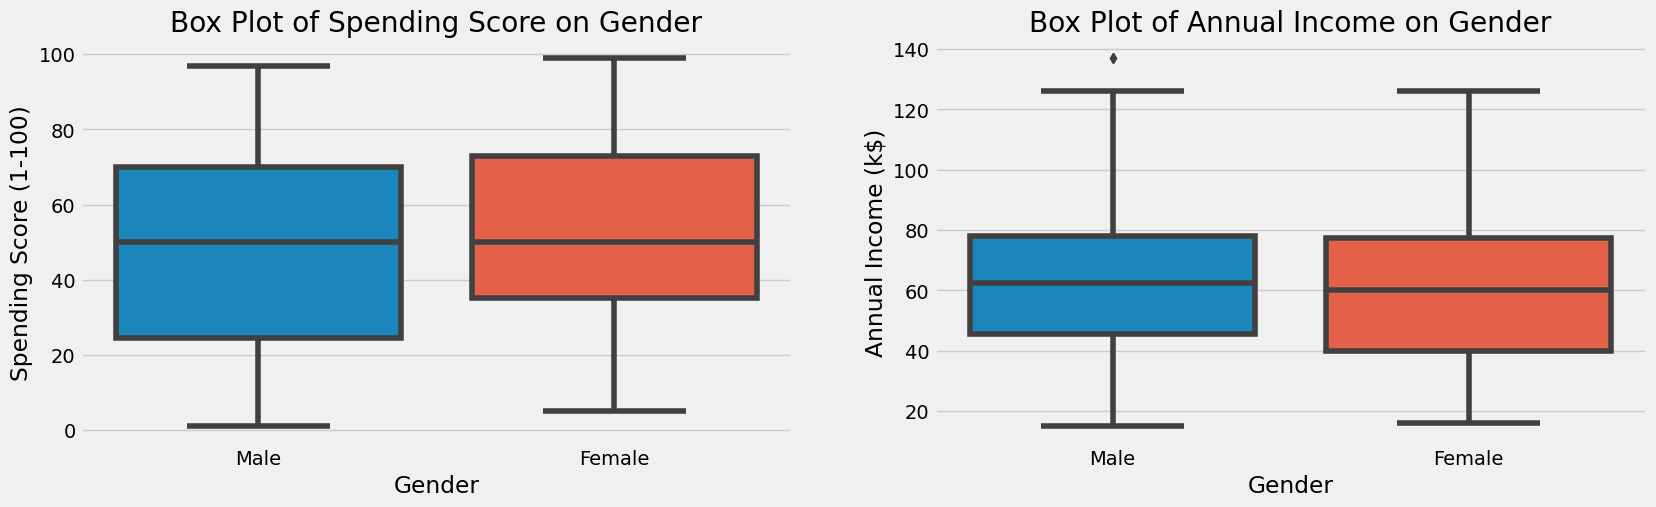

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))

plt.style.use('fivethirtyeight')
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=dataset, ax = ax1)
ax1.set_title('Box Plot of Spending Score on Gender')

plt.style.use('fivethirtyeight')
sns.boxplot(x='Gender', y='Annual Income (k$)', data=dataset, ax = ax2)
ax2.set_title('Box Plot of Annual Income on Gender')
plt.show()

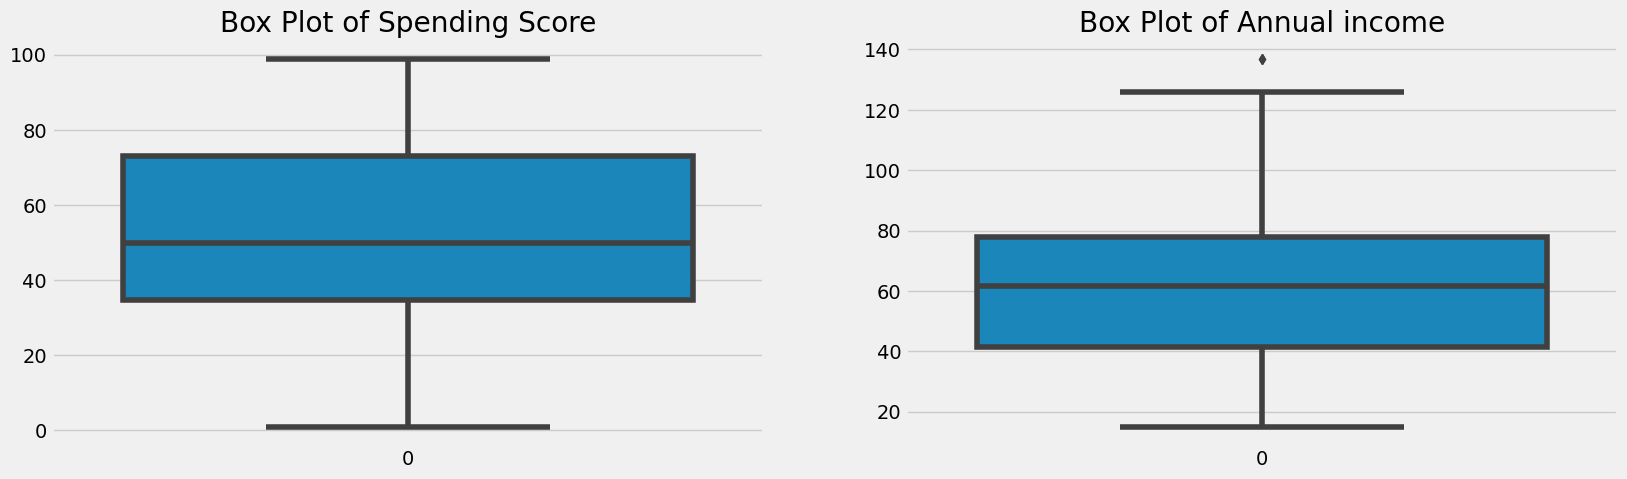

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))

plt.style.use('fivethirtyeight')
sns.boxplot(dataset['Spending Score (1-100)'], ax = ax1)
ax1.set_title('Box Plot of Spending Score')

plt.style.use('fivethirtyeight')
sns.boxplot(dataset['Annual Income (k$)'], ax = ax2)
ax2.set_title('Box Plot of Annual income')
plt.show()

This discovery prompts the removal of the outliers. This is done by getting the Inter Quartile Range (IQR = Q3 - Q1), then getting the upper limit (Q3 + (1.5 * IQR) and the lower limit (Q1 - (1.5 * IQR) where 1.5 is the determined constant by the IQR Rule to detect outliers. Figure 8 shows that a total of 2 outliers were removed. 

In [13]:
q1 = dataset['Annual Income (k$)'].quantile(0.25)
q3 = dataset['Annual Income (k$)'].quantile(0.75)

IQR = q3-q1

print("Quartile Measurements")
print("1st Quartile: {} \n3rd Quartile: {} \nInter Quartile Range: {} \n".format(q1, q3, IQR))

upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

print("Limits based on IQR Rule (Multiply IQR by 1.5, the constant used to detect outliers)")
print("Upper Limit: {} \nLower Limit: {} \n".format(upper_limit, lower_limit))

new_dataset = dataset.loc[(dataset['Annual Income (k$)'] <upper_limit) & (dataset['Annual Income (k$)'] > lower_limit)]
print('Total Outliers Removed: ',len(dataset)- len(new_dataset))


Quartile Measurements
1st Quartile: 41.5 
3rd Quartile: 78.0 
Inter Quartile Range: 36.5 

Limits based on IQR Rule (Multiply IQR by 1.5, the constant used to detect outliers)
Upper Limit: 132.75 
Lower Limit: -13.25 

Total Outliers Removed:  2


/tmp/ipykernel_21/3827195870.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset["Age"], ax = ax1)
/tmp/ipykernel_21/3827195870.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset["Annual Income (k$)"], ax = ax2)
/tmp/ipykernel_21/3827195870.py:12: UserWarning: 

`distplo

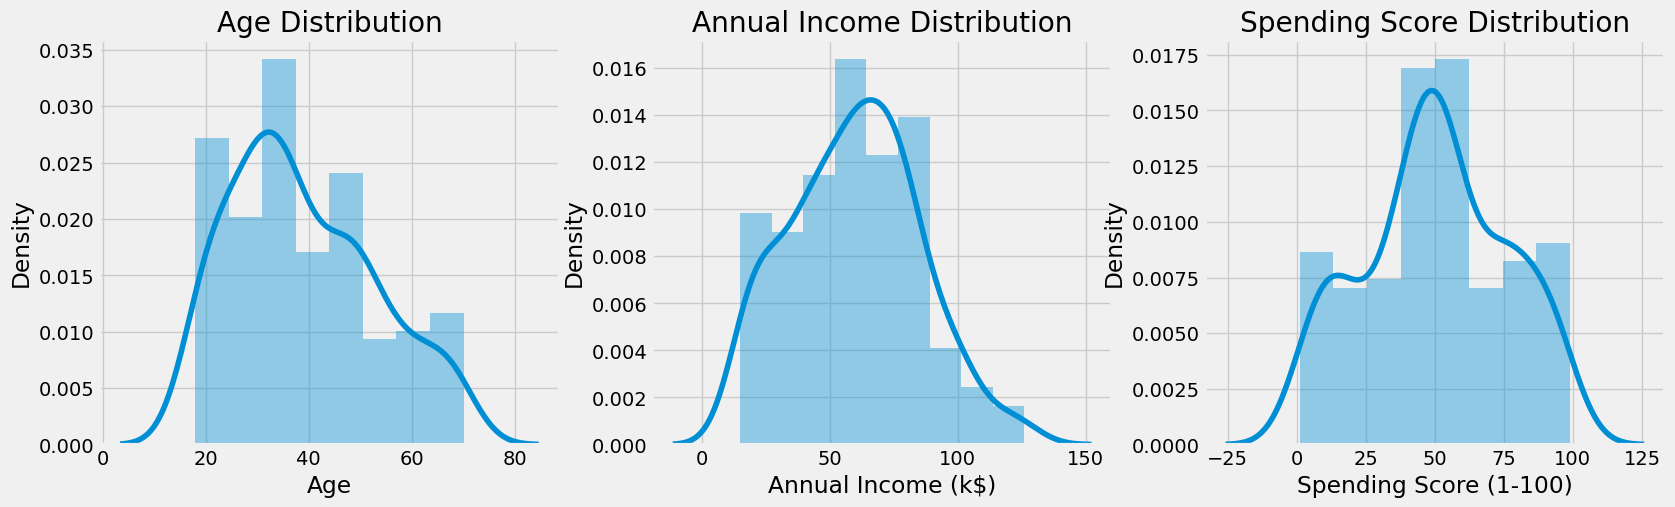

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

plt.style.use('fivethirtyeight')
#sns.set(style="fivethirtyeight")

sns.distplot(new_dataset["Age"], ax = ax1)
ax1.set_title('Age Distribution')

sns.distplot(new_dataset["Annual Income (k$)"], ax = ax2)
ax2.set_title('Annual Income Distribution')

sns.distplot(new_dataset["Spending Score (1-100)"], ax = ax3)
ax3.set_title('Spending Score Distribution')

plt.show()


After removing the outliers, a distribution plot for age, annual income, and spending score shows that age and annual income are right-skewed as expected since survival probability lowers as people age and that higher incomes are typically harder to secure. Spending score shows a normal distribution as most behavioral measurements are. 

In [15]:
X = new_dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values

<h1>Data Normalization</h1>

To normalize the data and prep it for clustering, scikit-learn’s MinMaxScaler is used since the remaining features have a bounded range and, except for the Spending Score, the distribution of remaining features is non-Gaussian. 

In [16]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_norm = min_max_scaler.fit_transform(X)

<h1>Clustering</h1>

In [17]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, n_init = 10,init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


K-Means Clustering will be employed on the Mall Customer Segmentation dataset. Considering that the pair plot shows annual income and spending score to have hints of clusters, both features are to be used for the clustering while leaving out age. 

K-Means Clustering requires a set number of clusters beforehand. To address this, the Elbow Method will be employed to determine the optimal number of clusters by finding the graphical knee. 

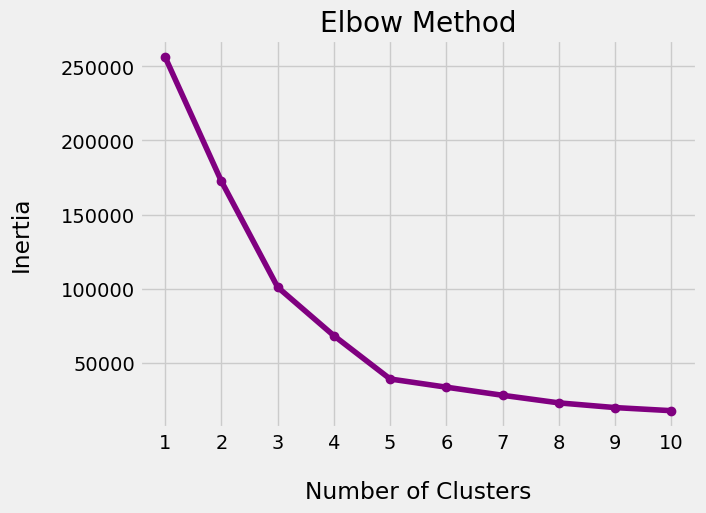

In [18]:
plt.style.use('fivethirtyeight')
plt.plot(range(1,11), wcss,color = 'purple',marker = 'o',label = 'Elbow Method')
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters", labelpad = 20)
plt.ylabel("Inertia", labelpad = 20)
plt.title("Elbow Method")
plt.show()


In [19]:
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init = 10)
y_kmeans = kmeans.fit_predict(X)
Y_pred = kmeans.labels_

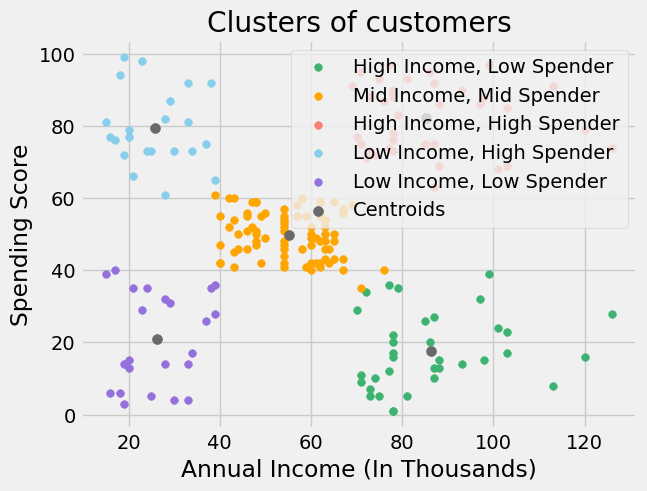

In [20]:
plt.style.use('fivethirtyeight')
colormap = ['mediumseagreen', 'orange', 'salmon', 'skyblue', 'mediumpurple']
labels = ['High Income, Low Spender', 'Mid Income, Mid Spender', 'High Income, High Spender', 'Low Income, High Spender', 'Low Income, Low Spender']
figsize=(100,100)
for i in range(0, 5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 30, c = colormap[i], label =labels[i])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'dimgrey', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (In Thousands)')
plt.ylabel('Spending Score')
plt.legend(loc = 'upper right')
plt.show()

In [21]:
cluster_center = kmeans.cluster_centers_
cluster = [1,2,3,4,5]

print("Cluster Center Coordinates:")
for i, pos in enumerate(cluster_center):
    print("Cluster",i+1, ":",pos)
    
print("\n")

Cluster Center Coordinates:
Cluster 1 : [86.34285714 17.57142857]
Cluster 2 : [55.0875 49.7125]
Cluster 3 : [85.21052632 82.10526316]
Cluster 4 : [25.72727273 79.36363636]
Cluster 5 : [26.30434783 20.91304348]




<h1> Analysis & Strategy </h1>

The <b>High-Income, High Spender cluster</b> should be the top priority of the mall. They have the capacity for huge purchase sizes and higher purchase frequency, therefore it would make sense to offer this cluster with loyalty programs, specifically VIP-exclusive perks, as well as first access to high-ticket items, to retain their high spending behavior. In terms of approach, they should be emailed, texted, or messaged on new arrivals, exclusive items, and new stores. Considering their purchase capacity, they should receive upsell offers during their spending spree as much as possible. 

The <b>Low Income, High Spender cluster</b> should be treated the same as High-Income, High Spender albeit with consideration of their income status. This cluster offers a steady cash flow and reliable inventory movement for the mall, that’s why they should be offered a loyalty program geared towards rewards. They should be contacted frequently on all possible communication platforms on upcoming sale as well as offers of low to mid-ticket items. To further progress their spending behavior, the mall should offer better credit terms and better payment accessibility, like digital transactions. 

The goal for the <b>Mid Income, Mid Spender cluster</b> is to move them to the high spender category as much as possible. The income-sensitive offers accommodated for the Low Income, High Spender should be replicated for this cluster as well on the same rate of frequency and exposure until they are triggered to spend. To maximize their purchase capacity when their buy mode is activated, the mall should always go for an upsell. 

The <b>High Income, Low Spender cluster</b> suggests that mallgoers under this cluster are thrifty. Considering their spending attitude and that they have considerable purchasing capacity, it would make sense to approach this cluster specifically with offers of bulk purchase discounts, packages that are aggregately cheaper (like an entertainment set that’s more expensive when sold separately), as well as event or holiday discounts for Christmas or Fathers’ day. 

The <b>Low Income, Low Spender cluster</b> should be the lowest marketing priority considering their inherently limited purchase capacity. Investment of marketing resources in this cluster should only be attempted until all methods of persuasion on the first 4 clusters are exhausted or when the first 4 clusters have achieved offer fatigue. 


<h1>Cluster Validation</h1>

In [22]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

SSE = kmeans.inertia_
CH = metrics.calinski_harabasz_score(X_norm, Y_pred)
DB_score = davies_bouldin_score (X_norm, Y_pred)
Sil_index = metrics.silhouette_score(X_norm, Y_pred, metric = 'euclidean')

print("Sum of Squared Errors: {}\nDavies-Bouldin Score: {}\nSilhouette Score: {}\nCalinski-Harabasz Score: {}".format(SSE, DB_score, Sil_index, CH))

Sum of Squared Errors: 39345.2770773277
Davies-Bouldin Score: 0.5632911704878923
Silhouette Score: 0.5640959164678206
Calinski-Harabasz Score: 273.60735953669194


The <b> Sum of Squared Errors </b>is used to evaluate clustering quality. The lower the SSE, the better the clustering output. However, this is a relative measure and should be reviewed within the context of the dataset. In this case, the SSE 39345 is acceptable as the elbow method shows that it’s the first value to dip below the 5000 inertia threshold. 

The <b>Davis-Bouldin Score</b> determines the clustering quality by calculating the ratio of intra-clusters and inter-clusters. The closer the score to zero, the better the quality of clustering. The clustering output showed a Davies Bouldin Score of 0.56, which means the clusters are partitioned well. 

The <b>Silhouette Score</b> shows the intra-cluster and inter-cluster variations. A Silhouette Score of -1 means incorrect clustering, 0, means overlapping cluster, and 1 means dense and well-separated clustering. Since the clustering output has a Silhouette Score of .56, that means the cluster is rather dense and separated. 

The <b>Calinski-Harabasz Score</b> is the ratio of the sum of intra-clusters and inter-clusters. The higher the score, the better the clustering density and separation. The Calinski-Harabasz score is usually used as a comparison of different clustering methods and parameters, however, using visual inspection of the cluster output and the results of SSE, Davis-Bouldin Score, and Silhouette Score as context suggests that 273.6 is a relatively good clustering score. 
